<a href="https://colab.research.google.com/github/minhnvm2307/ML-DL-Colaboratory/blob/main/ml/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Start with Gradient Descent
1. Linear Regression

  - House Pricing

## Fisrtly, install Kaggle API to use its datasets

In [ ]:
! pip install -q kaggle

###import gg DRIVE
###Make direction - Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

##Download dataset (House Pricing)

In [ ]:
! kaggle datasets download prokshitha/home-value-insights

Dataset URL: https://www.kaggle.com/datasets/prokshitha/home-value-insights
License(s): other


### Unzip the datasets downloaded file

In [ ]:
! unzip home-value-insights.zip

Archive:  home-value-insights.zip
  inflating: house_price_regression_dataset.csv  


# Load dataset
### Show the dataset to visualize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
house_data = pd.read_csv('/content/house_price_regression_dataset.csv')
house_data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


# Plot function
### This function show the training data points

In [ ]:
def plot_data(x_train, y_train, title, xlabel, ylabel):
  plt.scatter(x_train, y_train, c='r')
  # Title
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

### Predict function

  Function: y_hat = w * x + b
  - y_hat: predicted label
  - w: weights
  - b: bias

In [ ]:
def predict(x, weight, bias):
  y_hat = weight * x + bias
  return y_hat

## Cost Function

Function: $$J(w, b) = \frac{1}{2m} \sum_{i=1}^m (f_{w, b}(x^{(i)}) - y^{(i)})^2$$

  - J(w, b): Cost function
  - f(w, b): Linear function - y_hat
  - m: training size
  - w, b: weight, bias

In [ ]:
def cost_calculate(x_train, y_train, weight, bias):
  m = x_train.shape[0]
  cost = 0

  for i in range(m):
    error = x_train[i] * weight + bias - y_train[i]
    cost = cost + (1/(2*m)) * error**2


  total_cost = cost

  return total_cost

## Gradient Descent
Loop function:

  $$w = w - α * \frac{d}{dw}J(w,b)$$
  $$b = b - α * \frac{d}{db}J(w,b)$$

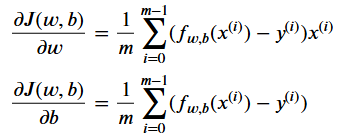

In [ ]:
def gradient_compute(x_train, y_train, weight, bias):
  m = x_train.shape[0]
  sum_J_db = 0
  sum_J_dw = 0

  for i in range(m):
    err = predict(x_train[i], weight, bias) - y_train[i]
    sum_J_db += err
    sum_J_dw += err * x_train[i]

  dj_dw = sum_J_dw / m
  dj_db = sum_J_db / m

  return dj_dw, dj_db

## Loop derivation
#### For minimize the cost function we need to decide the `weight` and `bias` for our predict function

  - We will init the (w, b) = (0. 0)
  - α = 0.001 (learning rate)
  - Epoch = 10

In [ ]:
def gradient_descent(x_train, y_train, weight_init, bias_init, alpha, loop, cost_calculate, predict):
  w, b = weight_init, bias_init
  cost_history = []
  p_history = []

  for i in range(loop):
    j_dw, j_db = gradient_compute(x_train, y_train, w, b)
    # Update the weight, bias
    w = w - alpha*j_dw
    b = b - alpha*j_db
    cost = cost_calculate(x_train, y_train, w, b)
    cost_history.append(cost)
    p_history.append(np.array([w, b]))

    if i % 1000 == 0:
      print(f"Iteration {i}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {j_dw: 0.3e}, dj_db: {j_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, cost_history, p_history

# Now we starting to predict House price based on its base_square

  - using pandas library

# Finding NaN value in dataset

In [ ]:
print(house_data["Square_Footage"].isna().sum())
print(house_data["House_Price"].isna().sum())


0
0


In [ ]:
area_data = house_data['Square_Footage'].to_numpy()
price_data = house_data['House_Price'].to_numpy()

# Split data

x_train, x_test, y_train, y_test = train_test_split(area_data, price_data)

print(x_train.shape, x_test.shape, type(x_train))

(750,) (250,) <class 'numpy.ndarray'>


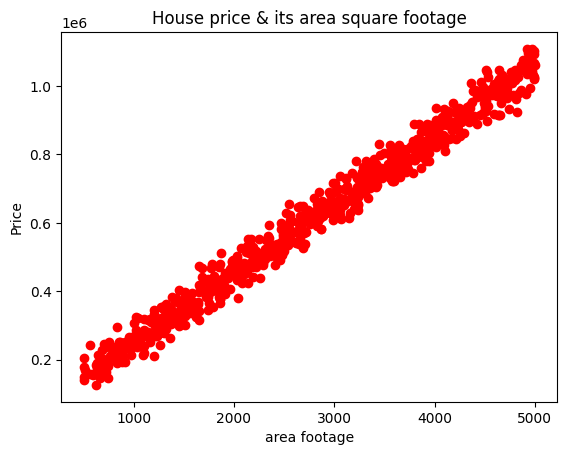

In [ ]:
plot_data(x_train, y_train, "House price & its area square footage", "area footage", "Price")

# Normalization
## 1. Min-Max normalize

## 2. Mean normalize

In [ ]:
def normalize_min_max(training_set):
  min_val = np.min(training_set)
  max_val = np.max(training_set)
  normalized_set = (training_set - min_val) / (max_val - min_val)
  return normalized_set

def normalize_z_score(training_set):
  # mean: trung binh
  # std: standard deriviation - do lech chuan
  mean = np.mean(training_set)
  std = np.std(training_set)
  return (training_set - mean) / std

def convert_weights_from_normalized(weight, bias, x_train, y_train):
  x_mean, x_std, y_mean, y_std = np.mean(x_train), np.std(x_train), np.mean(y_train), np.std(y_train)
  weight_raw = (weight * y_std) / x_std
  bias_raw = bias * y_std - weight * x_mean * y_std / x_std + y_mean
  return weight_raw, bias_raw

(750,)


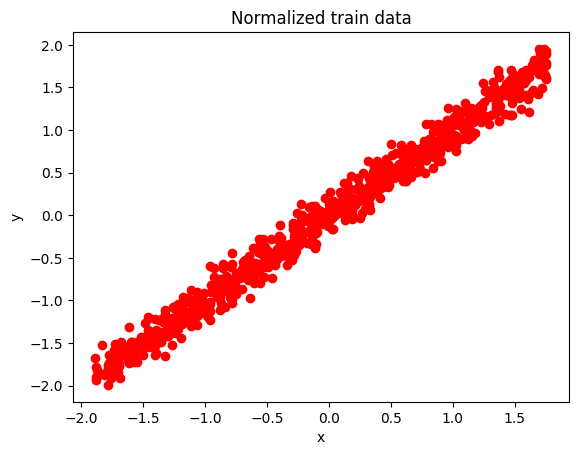

In [ ]:
y_train_norm = normalize_z_score(y_train)
x_train_norm = normalize_z_score(x_train)
print(y_train.shape)
plot_data(x_train_norm, y_train_norm, "Normalized train data", "x", 'y')

## Using Gradient Descent


In [ ]:
weight, bias, cost_history, p_history = gradient_descent(x_train_norm, y_train_norm, 0, 0, 0.001, 10000, cost_calculate, predict)

print(f'Finally weight = {weight:.4f} \nbias = {bias:.4f}')

Iteration 0: Cost 4.99e-01  dj_dw: -9.911e-01, dj_db: -1.868e-16   w:  9.911e-04, b: 1.86814e-19
Iteration 1000: Cost 7.51e-02  dj_dw: -3.644e-01, dj_db: -6.928e-17   w:  6.271e-01, b: 1.13043e-16
Iteration 2000: Cost 1.78e-02  dj_dw: -1.340e-01, dj_db: -3.049e-17   w:  8.573e-01, b: 1.61122e-16
Iteration 3000: Cost 1.00e-02  dj_dw: -4.927e-02, dj_db:  5.625e-18   w:  9.419e-01, b: 1.66532e-16
Iteration 4000: Cost 8.98e-03  dj_dw: -1.812e-02, dj_db:  4.737e-18   w:  9.730e-01, b: 1.66545e-16
Iteration 5000: Cost 8.84e-03  dj_dw: -6.662e-03, dj_db:  8.290e-18   w:  9.845e-01, b: 1.66536e-16
Iteration 6000: Cost 8.82e-03  dj_dw: -2.449e-03, dj_db: -1.184e-18   w:  9.887e-01, b: 1.66546e-16
Iteration 7000: Cost 8.82e-03  dj_dw: -9.006e-04, dj_db: -6.439e-18   w:  9.902e-01, b: 1.66595e-16
Iteration 8000: Cost 8.82e-03  dj_dw: -3.312e-04, dj_db:  4.589e-18   w:  9.908e-01, b: 1.66540e-16
Iteration 9000: Cost 8.82e-03  dj_dw: -1.218e-04, dj_db: -3.109e-18   w:  9.910e-01, b: 1.66569e-16
Fin

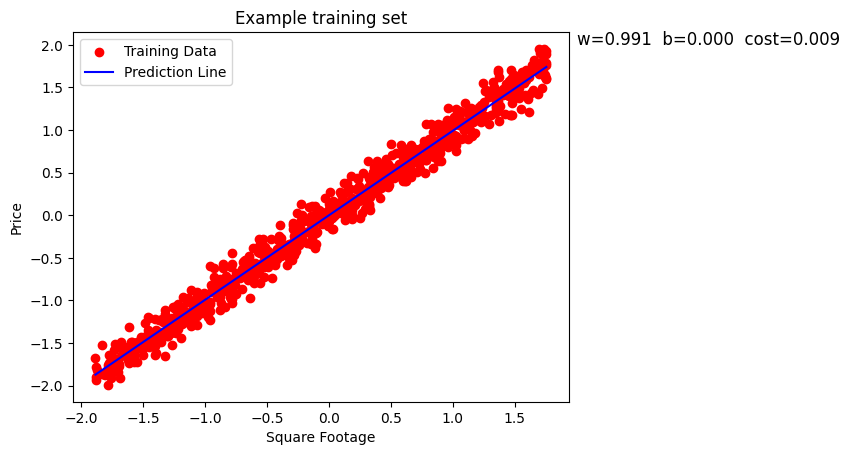

In [ ]:
# Line to plot the prediction
first_point_x, last_point_x = min(x_train_norm), max(x_train_norm)
x_points = np.array([first_point_x, last_point_x])

plt.scatter(x_train_norm, y_train_norm, c='r', label='Training Data')
plt.plot(x_points, predict(x_points, weight, bias), label='Prediction Line', color='blue')

# Text instead of annotate for simple labeling
plt.text(2, 2, f'w={weight:.3f}  b={bias:.3f}  cost={cost_history[-1]:.3f}', fontsize=12)

plt.title("Example training set")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
def predict_denorm(x_input, norm_weight, norm_bias, mean, std):
  x_norm = (x_input - mean) / std
  y_hat_norm = x_norm * norm_weight + norm_bias
  y_hat_denorm = y_hat_norm * std - mean
  return y_hat_denorm

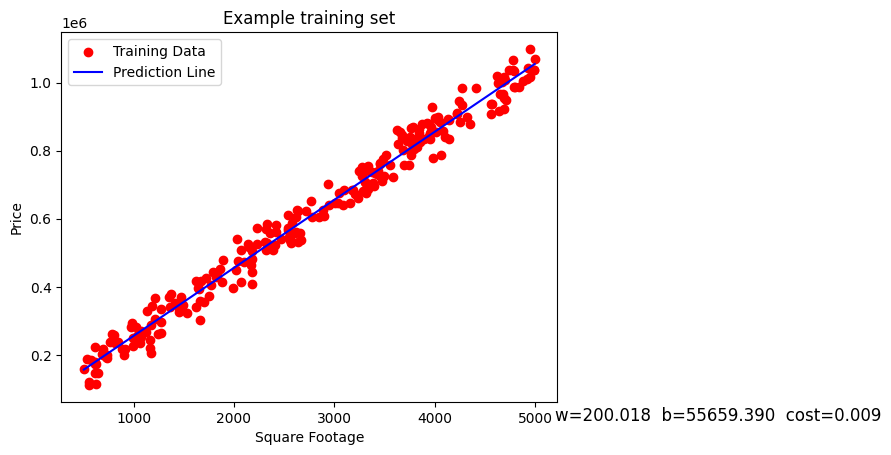

In [ ]:
# denorm w and b
raw_weight, raw_bias = convert_weights_from_normalized(weight, bias, x_train, y_train)

x_test1, x_test2 = min(x_test), max(x_test)
x_points = np.array([x_test1, x_test2])

plt.scatter(x_test, y_test, c='r', label='Training Data')
plt.plot(x_points, predict(x_points, raw_weight, raw_bias), label='Prediction Line', color='blue')

# Text instead of annotate for simple labeling
plt.text(5200, 5000, f'w={raw_weight:.3f}  b={raw_bias:.3f}  cost={cost_history[-1]:.3f}', fontsize=12)

plt.title("Example training set")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.legend()
plt.show()


# Score function


In [ ]:
def evaluate(x, y, weight, bias, method='r2'):
    y_pred = predict(x, weight, bias)

    if method == 'r2':
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

    elif method == 'rmse':
        return np.sqrt(np.mean((y - y_pred) ** 2))

    elif method == 'mae':
        return np.mean(np.abs(y - y_pred))

    else:
        raise ValueError("Unsupported method. Use 'r2', 'rmse', or 'mae'.")


In [ ]:
score = evaluate(x_test, y_test, raw_weight, raw_bias, method='r2') * 100
print(f'Score of my model: {score} %')

Score of my model: 98.320210831192 %
